In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# loading the data
user_reviews_path = "C:/Users/vanee/OneDrive/Documents/AI/UserReviews.xlsx"
#expert_reviews_path = "C:/Users/vanee/OneDrive/Documents/AI/ExpertReviews.xlsx"
#meta_clean_path = "C:/Users/vanee/OneDrive/Documents/AI/metaClean43Brightspace.xlsx"
#sales_path = "C:/Users/vanee/OneDrive/Documents/AI/sales.xlsx"

# reading the files
user_reviews = pd.read_excel(user_reviews_path)
#expert_reviews = pd.read_excel(expert_reviews_path)
#meta_clean = pd.read_excel(meta_clean_path)
#sales = pd.read_excel(sales_path)

In [4]:
user_reviews.shape

(319662, 7)

In [5]:
# check the first few rows of user reviews
user_reviews.head().transpose()

,0,1,2,3,4
url,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson
idvscore,8,9,10,6,8
reviewer,'Longbottom94','MartinB','Jaakko','CapoR','OrwellB.'
dateP,"'Apr 25, 2013'","'Oct 13, 2009'","'Jul 19, 2012'","'Oct 13, 2009'","'Oct 10, 2009'"
Rev,'Many have dismissed this film for not explor...,'Anyone who doesn t like this movie simply ju...,'Not sure what to think at this film at first...,'Nicely portrayed but it lacks the elements t...,'Bronson is more than entertainment. It is ar...
thumbsUp,2,0,1,0,0
thumbsTot,2,1,1,1,0


### Dataset
The user reviews dataset contains movie reviews left on Metacritic and their metadata in the following columns:
- *url*: Metacritic URL to the movie reviewed
- *idvscore*: score ranging from 0-10 given to the movie by an individual user
- *reviewer*: reviewer username
- *dateP*: date when the review was posted
- *Rev*: body of the review
- *thumbsUp*: amount of thumbs up given to the review by other users
- *thumbsTot*: total amount of thumbs up or down given to the review by other users

In [6]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319662 entries, 0 to 319661
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   url        319662 non-null  object
 1   idvscore   316258 non-null  object
 2   reviewer   316255 non-null  object
 3   dateP      316249 non-null  object
 4   Rev        316249 non-null  object
 5   thumbsUp   316082 non-null  object
 6   thumbsTot  316086 non-null  object
dtypes: object(7)
memory usage: 17.1+ MB


In [7]:
# summary statistics of user reviews
user_reviews.describe()

,url,idvscore,reviewer,dateP,Rev,thumbsUp,thumbsTot
count,319662,316258,316255,316249,316249,316082,316086
unique,11364,16,106795,6489,311558,209,287
top,https://www.metacritic.com/movie/joker,10,'TVJerry',"'Mar 8, 2019'",'',0,0
freq,2764,74562,1626,878,773,197106,147659


In [8]:
# check for missing values user reviews
user_reviews.isna().sum()

url             0
idvscore     3404
reviewer     3407
dateP        3413
Rev          3413
thumbsUp     3580
thumbsTot    3576
dtype: int64

In [9]:
# checking the unique values in 'thumbsTot' column
user_reviews['thumbsTot'].unique()

array([2, 1, 0, 3, nan, 12, 6, 5, 9, 4, 67, 96, 19, 11, 10, 16, 17, 7, 13,
       8, 18, 30, 15, 42, 23, 33, 14, 32, 20, 28, 22, 31, 24, 21, 39, 48,
       40, 27, 26, 57, 25, 46, 29, 41, 50, 64, 55, 47, 69, 34, 35, 37, 83,
       58, 38, 77, 36, 92, 56, 59, 61, 54, 88, 65, 74, 99, 86, 63, 72, 43,
       95, 85, 94, 101, 45, 75, 98, 73, 119, 81, 102, 70, 68, 201, 49, 52,
       44, 53, 91, 188, 163, 185, 140, 131, 78, 139, 179, 129, 158, 147,
       60, 62, 126, 130, 132, 66, 71, 120, 116, 135, 93, 51, 105, 89, 106,
       104, 90, 79, 76, 82, 84, 80, 204, 100, 166,
       ' 1}, {indvscore: 8, reviewer: AlbertP., date_published: Jul 13, 2009, review_text: Until last night, until Bruno, The Hangover was the funniest movie I, thumbs_up: 0, thumbs_total: 1}, {indvscore: 9, reviewer: StewartP, date_published: Jul 13, 2009, review_text: A very good satire that hits all the points, thumbs_up: 0, thumbs_total: 2}, {indvscore: 10, reviewer: KenG, date_published: Jul 14, 2009, review_text: Bril

The column 'thumbsTot' contains multiple non-numeric values (e.g. links, misplaced reviews and their metadata, etc). To fix this, the non-numeric values will be converted to NaN values and the rows will be dropped.

However, first we will converted the existing NaN values to 0 to avoid dropping useful columns with the rows that contain non-numeric data.

In [10]:
# replace existing NaN values with 0
user_reviews['thumbsTot'].fillna(0, inplace=True)

# converting non-numeric values to NaN
user_reviews['thumbsTot'] = pd.to_numeric(user_reviews['thumbsTot'], errors='coerce')

# dropping  rows with the invalid non-numeric NaN
user_reviews.dropna(subset=['thumbsTot'])

# print the result
user_reviews['thumbsTot']

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\2746780116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['thumbsTot'].fillna(0, inplace=True)


0         2.0
1         1.0
2         1.0
3         1.0
4         0.0
         ... 
319657    0.0
319658    0.0
319659    0.0
319660    0.0
319661    0.0
Name: thumbsTot, Length: 319662, dtype: float64

In [11]:
unique_values = user_reviews['thumbsTot'].unique()
sorted(unique_values)  # Sorted for better visualization

[np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(17.0),
 np.float64(18.0),
 np.float64(19.0),
 np.float64(20.0),
 np.float64(21.0),
 np.float64(22.0),
 np.float64(23.0),
 np.float64(24.0),
 np.float64(25.0),
 np.float64(26.0),
 np.float64(27.0),
 np.float64(28.0),
 np.float64(29.0),
 np.float64(30.0),
 np.float64(31.0),
 np.float64(32.0),
 np.float64(33.0),
 np.float64(34.0),
 np.float64(35.0),
 np.float64(36.0),
 np.float64(37.0),
 np.float64(38.0),
 np.float64(39.0),
 np.float64(40.0),
 np.float64(41.0),
 np.float64(42.0),
 np.float64(43.0),
 np.float64(44.0),
 np.float64(45.0),
 np.float64(46.0),
 np.float64(47.0),
 np.float64(48.0),
 np.float64(49.0),
 np.float64(50.0),
 np.float64(51.0),
 np.float64(52.0),
 np

In [12]:
# checking that there are no strings left in the column and column stats
user_reviews['thumbsTot'].describe()

count    319656.000000
mean          4.173311
std          13.438349
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        1422.000000
Name: thumbsTot, dtype: float64

In [13]:
# checking that all values are integers before converting to int64
has_fractions = (user_reviews['thumbsTot'] % 1 != 0).any()

if has_fractions:
    print("There are non-integer values in the column.")
else:
    print("All values in the column are integers.")

There are non-integer values in the column.


In [14]:
user_reviews.isna().sum()

url             0
idvscore     3404
reviewer     3407
dateP        3413
Rev          3413
thumbsUp     3580
thumbsTot       6
dtype: int64

In [15]:
user_reviews['thumbsTot'][~user_reviews['thumbsTot'].apply(np.isfinite)]

56159    NaN
59309    NaN
124298   NaN
211271   NaN
214546   NaN
307943   NaN
Name: thumbsTot, dtype: float64

There are still 6 NaN values in the column. We will perform the data cleaning steps again and then check to see if any NaN values remain before converting the column values to int64.

In [16]:
user_reviews['thumbsTot'].fillna(0, inplace=True) # replacing NaN values with 0
user_reviews['thumbsTot'] = pd.to_numeric(user_reviews['thumbsTot'], errors='coerce') # convert values to numeric values

In [17]:
user_reviews['thumbsTot'].isna().sum()

np.int64(0)

In [18]:
# converting column to int64
user_reviews['thumbsTot'] = user_reviews['thumbsTot'].astype('int64')

# verifying conversion
user_reviews['thumbsTot'].dtype

dtype('int64')

In [19]:
# printing unique elements after type conversion
user_reviews['thumbsTot'].unique()

array([   2,    1,    0,    3,   12,    6,    5,    9,    4,   67,   96,
         19,   11,   10,   16,   17,    7,   13,    8,   18,   30,   15,
         42,   23,   33,   14,   32,   20,   28,   22,   31,   24,   21,
         39,   48,   40,   27,   26,   57,   25,   46,   29,   41,   50,
         64,   55,   47,   69,   34,   35,   37,   83,   58,   38,   77,
         36,   92,   56,   59,   61,   54,   88,   65,   74,   99,   86,
         63,   72,   43,   95,   85,   94,  101,   45,   75,   98,   73,
        119,   81,  102,   70,   68,  201,   49,   52,   44,   53,   91,
        188,  163,  185,  140,  131,   78,  139,  179,  129,  158,  147,
         60,   62,  126,  130,  132,   66,   71,  120,  116,  135,   93,
         51,  105,   89,  106,  104,   90,   79,   76,   82,   84,   80,
        204,  100,  166,  253,  124,  127,  182,  133,  197,   97,  137,
        154,  150,  128,  149,  148,  146,  103,  144,  142,  141,  138,
        156,  117,  155,  173,  134,  153,  152,  1

In [20]:
# checking the datatypes in the column
print(user_reviews['thumbsUp'].apply(type).unique())

# check for null values in the column
user_reviews['thumbsUp'].isna().sum()

[<class 'int'> <class 'float'> <class 'str'>]


np.int64(3580)

In [21]:
# printing unique elements 'thumbsUp'
user_reviews['thumbsUp'].unique()

array([2, 0, 1, nan, 3, 11, 4, 6, 48, 18, 5, 7, 14, 8, 10, 19, 23, 15, 13,
       12, 30, 9, 20, 27, 22, 16, 50, 17, 41, 52, 44, 37, 54, 26, 24, 28,
       33, 56, 25, 21, 34, 47, 31, 32, 53, 45, 49, 42, 35, 38, 43, 64, 39,
       29, 46, 102, 87, 98, 74, 69, 73, 94, 67, 82, 76, 65, 68, 36, 60,
       58, 51, 40, 202, 78, 55, ' rock band dude caricature (oh wait',
       196, 71, 81, 166, 108, 59, 129, 147, 143, 122, 142, 121, 141, 140,
       100, 80, 139, 79, 118, 137, 97, 135, 96, 134, 133, 95, 57, 113,
       150, 75, 131, 93, 130, 148, 111, 92, 110, 164, 91, 127, 145, 144,
       126, 90, 72, 125, 107, 89, 124, 123, 88, 105, 70, 104, 154, 153,
       119, 85, 152, 101, 151, 84, 117, 83, 116, 132, 115, 114, 178, 128,
       159, 62, 77, 61, 120, 149, 146, 66, 215, 175, 189, 86, 335, 295,
       298, 222, 216, 176, 181, 183, 167, 228, 138, 106, 99, 63, 165, 186,
       184, 103, 227, 200, 285, 193, 199, 205, 208, 276, 238, 281, 219,
       268, 314, 157, 163, 220, 226, 207, 158, 155

Just like the previous 'thumbsTot' column, 'thumbsUp' also has more than one datatype.

In [22]:
# replace existing NaN values with 0
user_reviews['thumbsUp'].fillna(0, inplace=True)

# converting non-numeric values to NaN
user_reviews['thumbsUp'] = pd.to_numeric(user_reviews['thumbsUp'], errors='coerce')

# dropping  rows with the invalid non-numeric NaN
user_reviews.dropna(subset=['thumbsUp'], inplace=True)

# print the result
user_reviews['thumbsUp']

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\2654919939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['thumbsUp'].fillna(0, inplace=True)


0         2.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
319657    0.0
319658    0.0
319659    0.0
319660    0.0
319661    0.0
Name: thumbsUp, Length: 319661, dtype: float64

In [23]:
# checking that there are no strings left in the column and column stats
user_reviews['thumbsUp'].describe()

count    319661.000000
mean          2.084815
std           8.202704
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         562.000000
Name: thumbsUp, dtype: float64

In [24]:
# converting column to int64
user_reviews['thumbsUp'] = user_reviews['thumbsUp'].astype('int64')

# verifying conversion
user_reviews['thumbsUp'].dtype

dtype('int64')

In [25]:
# checking unique elements after type conversion
user_reviews['thumbsUp'].unique()

array([  2,   0,   1,   3,  11,   4,   6,  48,  18,   5,   7,  14,   8,
        10,  19,  23,  15,  13,  12,  30,   9,  20,  27,  22,  16,  50,
        17,  41,  52,  44,  37,  54,  26,  24,  28,  33,  56,  25,  21,
        34,  47,  31,  32,  53,  45,  49,  42,  35,  38,  43,  64,  39,
        29,  46, 102,  87,  98,  74,  69,  73,  94,  67,  82,  76,  65,
        68,  36,  60,  58,  51,  40, 202,  78,  55, 196,  71,  81, 166,
       108,  59, 129, 147, 143, 122, 142, 121, 141, 140, 100,  80, 139,
        79, 118, 137,  97, 135,  96, 134, 133,  95,  57, 113, 150,  75,
       131,  93, 130, 148, 111,  92, 110, 164,  91, 127, 145, 144, 126,
        90,  72, 125, 107,  89, 124, 123,  88, 105,  70, 104, 154, 153,
       119,  85, 152, 101, 151,  84, 117,  83, 116, 132, 115, 114, 178,
       128, 159,  62,  77,  61, 120, 149, 146,  66, 215, 175, 189,  86,
       335, 295, 298, 222, 216, 176, 181, 183, 167, 228, 138, 106,  99,
        63, 165, 186, 184, 103, 227, 200, 285, 193, 199, 205, 20

In [26]:
# intermediate check for missing values after cleaning previous columns
user_reviews.isna().sum()

url             0
idvscore     3404
reviewer     3406
dateP        3412
Rev          3412
thumbsUp        0
thumbsTot       0
dtype: int64

In [27]:
# checking datatypes in the idvscore column
user_reviews['idvscore'].apply(type).unique()

array([<class 'int'>, <class 'float'>, <class 'str'>], dtype=object)

In [28]:
user_reviews['idvscore'].unique()

array([8, 9, 10, 6, 7, 4, 5, 3, 0, nan, 2, 1, ':;;$$', ' cargo carriers',
       'few i think?? i cam out the theather seeing people smile and hearing people say that was worth the waith no bull! I can t wait for a sequel it will be better than this one or just as good as the this one???it just a great winning film in your mind that u',
       ';!?'], dtype=object)

In [29]:
# replace existing NaN values with 0
user_reviews['idvscore'].fillna(0, inplace=True)

# converting non-numeric values to NaN
user_reviews['idvscore'] = pd.to_numeric(user_reviews['idvscore'], errors='coerce')

# dropping  rows with the invalid non-numeric NaN
user_reviews.dropna(subset=['idvscore'], inplace=True)

# print the result
print(user_reviews['idvscore'])

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\1084589540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['idvscore'].fillna(0, inplace=True)


0          8.0
1          9.0
2         10.0
3          6.0
4          8.0
          ... 
319657    10.0
319658    10.0
319659    10.0
319660    10.0
319661    10.0
Name: idvscore, Length: 319657, dtype: float64


In [30]:
# checking column statistics
print(user_reviews['idvscore'].describe())

count    319657.000000
mean          6.537814
std           3.240495
min           0.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          10.000000
Name: idvscore, dtype: float64


In [31]:
# converting column to int64
user_reviews['idvscore'] = user_reviews['idvscore'].astype('int64')

# verifying conversion
user_reviews['idvscore'].dtype

dtype('int64')

In [32]:
# checking datatypes in the 'reviewer' column
user_reviews['reviewer'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [33]:
user_reviews['reviewer'].unique()

array([" 'Longbottom94'", " 'MartinB'", " 'Jaakko'", ...,
       " 'CommonGamer'", " 'juiliopaublito'", " 'PorridgeBoy3000'"],
      dtype=object)

In [34]:
user_reviews['reviewer'].fillna('Username not provided', inplace=True) # replace missing values with a string
user_reviews['reviewer'].isna().sum() # checking there are no missing values left

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\1408575882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['reviewer'].fillna('Username not provided', inplace=True) # replace missing values with a string


np.int64(0)

In [35]:
user_reviews['Rev'].isna().sum()

np.int64(3408)

In [36]:
user_reviews['Rev'].fillna('Review missing', inplace=True) # replacing missing reviews with a string
user_reviews['Rev'].isna().sum() # checking there are no missing values left

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\2605006259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['Rev'].fillna('Review missing', inplace=True) # replacing missing reviews with a string


np.int64(0)

In [37]:
user_reviews['dateP'].unique()

array([" 'Apr 25, 2013'", " 'Oct 13, 2009'", " 'Jul 19, 2012'", ...,
       " 'Dec 22, 2002'", " 'May 8, 2003'", " 'Feb 12, 2003'"],
      dtype=object)

In [38]:
user_reviews['dateP'] = pd.to_datetime(user_reviews['dateP'], errors='coerce') # converting to datetime dtype
earliest_time=user_reviews['dateP'].min() # finding out the earliest date in the dataset
user_reviews['dateP'].fillna(earliest_time, inplace=True) # replacing missing values with the earliest date

C:\Users\vanee\AppData\Local\Temp\ipykernel_26400\1737576494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reviews['dateP'].fillna(earliest_time, inplace=True) # replacing missing values with the earliest date


In [39]:
user_reviews.isna().sum() # final check to see if there are any missing values left

url          0
idvscore     0
reviewer     0
dateP        0
Rev          0
thumbsUp     0
thumbsTot    0
dtype: int64

Creating a new column named 'movieName' that stores the name of the movie that was reviewed.

In [40]:
user_reviews['movieName'] = user_reviews['url'].str.extract(r'/movie/([^/]+)') # extracting the movie name from the url
user_reviews['movieName'] = user_reviews['movieName'].str.replace('-', ' ').str.title()
user_reviews.head().transpose()

,0,1,2,3,4
url,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson,https://www.metacritic.com/movie/bronson
idvscore,8,9,10,6,8
reviewer,'Longbottom94','MartinB','Jaakko','CapoR','OrwellB.'
dateP,2013-04-25 00:00:00,2009-10-13 00:00:00,2012-07-19 00:00:00,2009-10-13 00:00:00,2009-10-10 00:00:00
Rev,'Many have dismissed this film for not explor...,'Anyone who doesn t like this movie simply ju...,'Not sure what to think at this film at first...,'Nicely portrayed but it lacks the elements t...,'Bronson is more than entertainment. It is ar...
thumbsUp,2,0,1,0,0
thumbsTot,2,1,1,1,0
movieName,Bronson,Bronson,Bronson,Bronson,Bronson


## EDA

<Axes: >

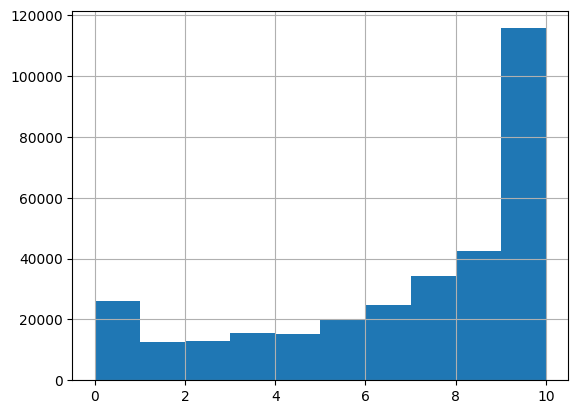

In [41]:
user_reviews['idvscore'].hist(bins=10) # distribution of idvscore in dataset

<Axes: xlabel='dateP'>

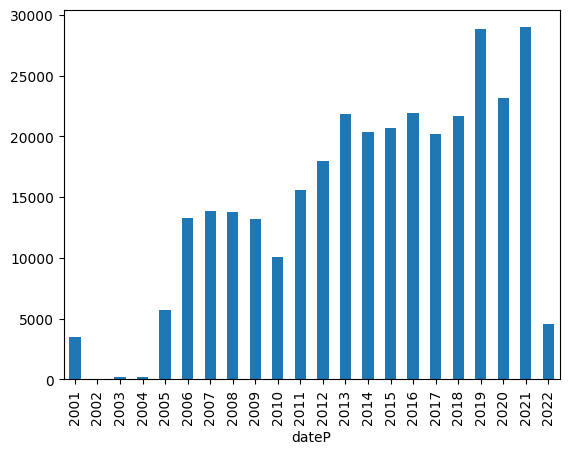

In [42]:
user_reviews.groupby(user_reviews['dateP'].dt.to_period('Y')).size().plot(kind='bar') # distribution of reviews posted by year

Top 10 reviewers

<Axes: xlabel='reviewer'>

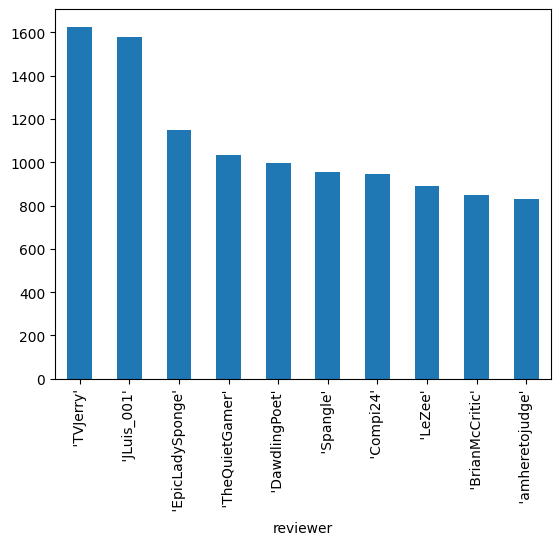

In [43]:
exclude_reviewer = 'Username not provided' # excluding the reviews with a missing username
filtered_counts = user_reviews['reviewer'][user_reviews['reviewer'] != exclude_reviewer].value_counts() # filtering out the reviews wih missing username from the value counts

filtered_counts.head(10).plot(kind='bar') # plotting top 10 reviewers

**What are the best 20 titles according to idvscore?**

In [44]:
top_movies = user_reviews.groupby('movieName')['idvscore'].mean().reset_index() # calculate the mean idvscore for each movie

top_movies.sort_values('idvscore', ascending=False).reset_index(drop=True)[:20] # sorting movies in asceding order

,movieName,idvscore
0,Zero Motivation,10.0
1,Zombie Honeymoon,10.0
2,Zizek!,10.0
3,Return To Nuke Em High Volume 1,10.0
4,Revoloution,10.0
5,Ride Your Wave,10.0
6,Under The Citys Skin,10.0
7,Behind The Sun,10.0
8,Behemoth,10.0
9,Benji,10.0


Do reviews who give movies a higher score receive more thumbs up?

<Axes: xlabel='idvscore', ylabel='thumbsUp'>

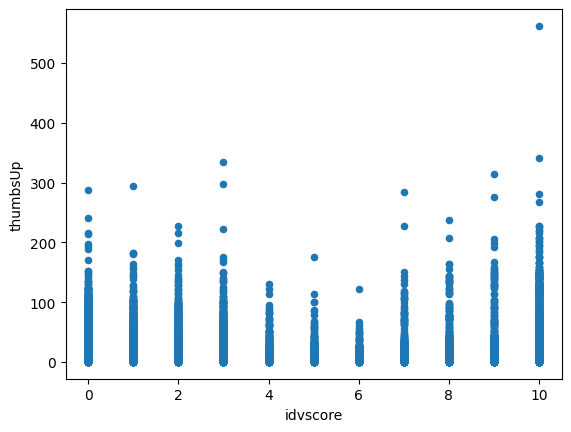

In [45]:
user_reviews.plot.scatter(x='idvscore', y='thumbsUp')

In [46]:
user_reviews['revLength'] = user_reviews['Rev'].apply(len) # create column for review length

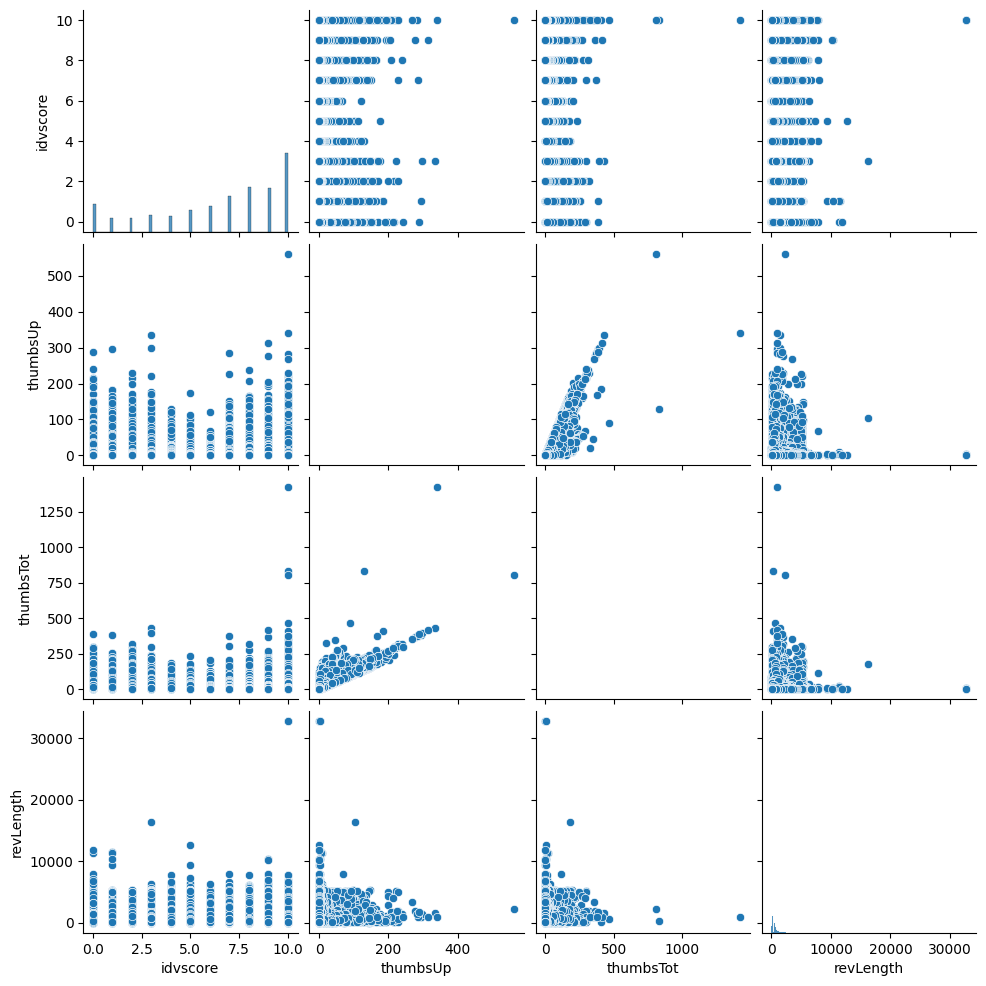

In [47]:
sns.pairplot(user_reviews[['idvscore', 'thumbsUp', 'thumbsTot', 'revLength']])
plt.show()

In [48]:
user_reviews[['idvscore', 'thumbsUp', 'thumbsTot', 'revLength']].corr()

,idvscore,thumbsUp,thumbsTot,revLength
idvscore,1.000000,-0.081373,-0.097192,-0.023952
thumbsUp,-0.081373,1.000000,0.892099,0.046810
thumbsTot,-0.097192,0.892099,1.000000,0.051131
revLength,-0.023952,0.046810,0.051131,1.000000


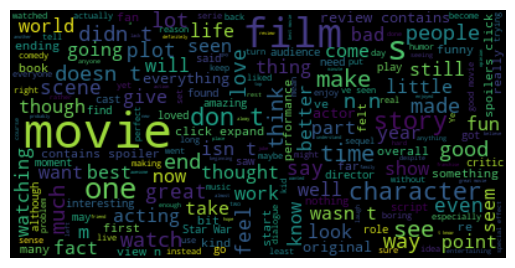

In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS) 
stopwords.add('movie')
stopwords.add('look')

text = " ".join(user_reviews['Rev']) # combine reviews into one string
word_cloud = WordCloud(background_color='white', max_words=50, stopwords=stopwords, colormap='viridis').generate(text)

# lower max_font_size
word_cloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()